# Научная графика в Python

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

URL: [Заметки по программированию в науках о Земле](http://progeoru.blogspot.ru/)

Дата последнего обновления: 12.03.2017

In [1]:
# Преамбула
%matplotlib inline

import os
import matplotlib.pyplot as plt
from matplotlib import rcParams

import numpy as np

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

rcParams['font.family'] = 'fantasy'
rcParams['font.fantasy'] = 'Arial'

## Глава 11 Графики в полярной системе координат

### Содержание главы

1. Полярная система координат;

2. Роза ветров;

3. Настройка графика в полярных координат.

По умолчанию двумерные графики имеют прямоугольную декартову систему координат. В некоторых задачах намного нагляднее отображать информацию на круге, а не в прямоугольнике. Например, при отображении розы ветров. Переход от прямоугольной формы основы рисунка к кругу позволяет нагляднее отобразить графики, заданные в полярной системе координат (polar plots).

### Электронные ресурсы:

+ [Документация по специфическим методам для polar axes](http://matplotlib.org/devel/add_new_projection.html?highlight=set_thetagrids#matplotlib.projections.polar.PolarAxes.set_thetagrids);

+ [Примеры создания графиков в полярных координатах](http://matplotlib.org/examples/pylab_examples/polar_demo.html);

+ [Легенда для графика в полярных координатах](http://matplotlib.org/examples/pylab_examples/polar_legend.html);

+ [Использование log-шкалы в полярных координатах: о проблемах в функциях rscale и rlim](http://stackoverflow.com/questions/14919407/how-to-use-log-scale-on-polar-axis-in-matplotlib).

### 11.1 Полярная система координат

Так как polar plots используют полярную систему координат, кратко вспомним что это такое и как она связана с декартовой (прямоугольной) системой координат.

В декартовой системе координат, которая используется по умолчанию, положение точки определяется двумя значениями: аргументом x и значением функции y. 

В полярной системе координат положение точки также определяется двумя значениями: радиусом r и углом phi. Угол обычно отсчитывают против часовой стрелке от "восточного" (3:00) направления.

Переход из полярной системы координат в прямоугольную выглядит так:

`x = r*cos(phi)`

`y = r*sin(phi)`

Переход из декартовой в полярную систему координат осуществляется [чуть сложнее](https://en.wikipedia.org/wiki/Polar_coordinate_system).

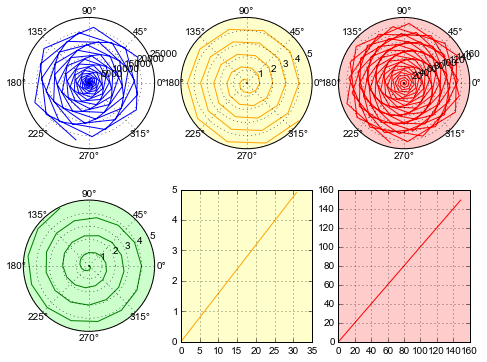

In [2]:
# Пример 11.1.1

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8., 6.))
x = np.arange(150)
y = x**2 + 2.5

lag = 0.05*np.pi
r = np.arange(0.0, 5.0, 0.1)
phi = r*np.pi #np.arange(-2*np.pi, 2*np.pi + lag, lag)

# x и y
ax1 = fig.add_subplot(231, projection='polar')
ax1.plot(x, y)
ax1.grid(True)

ax2 = fig.add_subplot(232, projection='polar', axisbg='#FFFFCC')
ax2.plot(phi*2., r, 'orange')
ax2.grid(True)

ax3 = fig.add_subplot(233, projection='polar', axisbg='#FFCCCC')
ax3.plot(x, x, 'r')
ax3.grid(True)

ax4 = fig.add_subplot(234, projection='polar', axisbg='#CCFFCC')
ax4.plot(-1.5*phi, r, 'g')
ax4.grid(True)

ax5 = fig.add_subplot(235, axisbg='#FFFFCC')
ax5.plot(phi*2., r, 'orange')
ax5.grid(True)

ax6 = fig.add_subplot(236, axisbg='#FFCCCC')
ax6.plot(x, x, 'r')
ax6.grid(True)

save('pic_11_1_1', fmt='png')
save('pic_11_1_1', fmt='pdf')

plt.show()

Вообще говоря matplotlib позволяет рисовать не только в полярной системе координат, но и в других. За это отвечает параметр projection, который в случае равенства значению 'polar' аналогичен значению параметра polar=True. В matplotlib поддерживаются следующие проекции: 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear'. Чаще всего используются два последних варианта, остальные являются экзотическими для рутинных задач в научной графике.

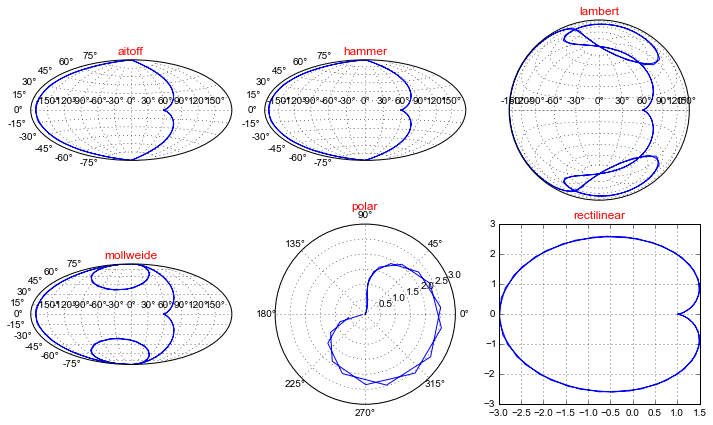

In [3]:
# Пример 11.1.2

import matplotlib.pyplot as plt
import numpy as np

a = 1.
x = np.arange(-2*np.pi, 2*np.pi, 0.2)
y = np.sin(x) * np.cos(x)
# Уравнение кардиойды
xz = a*(2*np.cos(x) - np.cos(2*x))
yz = a*(2*np.sin(x) - np.sin(2*x))

label = ['aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear']

fig = plt.figure(figsize=(10,6))

for i in xrange(len(label)):

    ax = fig.add_subplot(231+i, projection=label[i])
    ax.plot(xz, yz)
    ax.set_title(label[i], color='r')
    ax.grid(True)

plt.tight_layout()

save('pic_11_1_2', fmt='png')
save('pic_11_1_2', fmt='pdf')

plt.show()

### 11.2 Роза ветров

С помощью polar plots можно построить особый вид графиков - "розу ветров". 

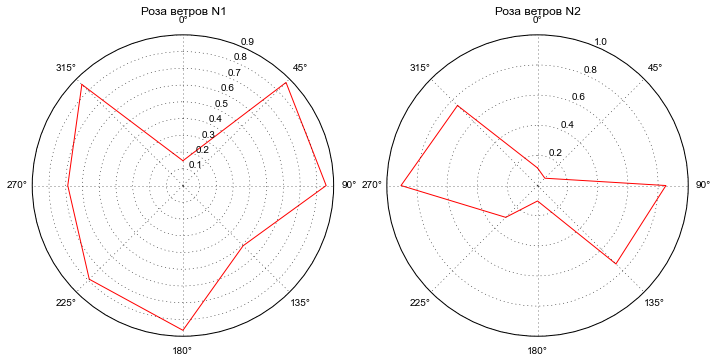

In [4]:
# Пример 11.2

from math import pi
import matplotlib.pyplot as plt
import numpy as np

lag = pi/4.
angles = np.arange(0, 2*pi , lag)

fig = plt.figure(figsize=(10,5)) # зададим явно размер полотна, чтобы графики не перекрывались

for i in xrange(1, 3):

    r = np.random.random(len(angles)) # для каждой розы значения будут разные

    ax = fig.add_subplot(120+i, projection='polar')
    ax.plot(angles, r, color='r', linewidth=1.)
    # Так как 0 и 2*pi - это одна и та же точка, то значение в ней должно быть одно
    # Однако, будет разрыв между последней точкой и нулевой.
    # Чтобы его убрать, искусственно соединим эти точки.

    # Замыкаем розу ветров (соединяем конец с началом)
    ax.plot((angles[-1],angles[0]),(r[-1],r[0]), color='r', linewidth=1.)

    # Изменяем направление обхода с "против часовой" на "по часовой"
    ax.set_theta_direction(-1)
    
    # Смещаем нулевую или полярную ось на 90 градусов против часовой стрелки, в положение "север"
    ax.set_theta_offset(pi/2.0)

    ax.set_title(u"Роза ветров N%d" % i, loc='center')

plt.tight_layout()

save('pic_11_2', fmt='png')
save('pic_11_2', fmt='pdf')

plt.show()   

### 11.3 Настройка графика в полярных координат

Полярный график по сути ничем не отличается от привычного прямоугольного графика. Соответственно, практически все пользовательские настройки осуществляются аналогично.

('old r:', [0.20000000000000001, 0.40000000000000002, 0.60000000000000009, 0.80000000000000004, 1.0])
('old phi:', array([ 0.        ,  0.78539816,  1.57079633,  2.35619449,  3.14159265,
        3.92699082,  4.71238898,  5.49778714]))


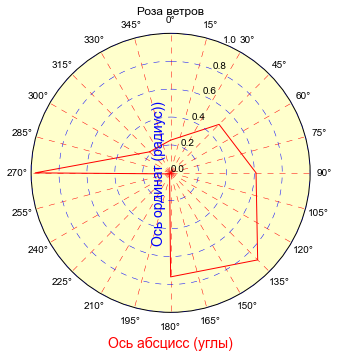

In [5]:
# Пример 11.3.1

from math import pi
import matplotlib.pyplot as plt
import numpy as np

lag = pi/4.
angles = np.arange(0, 2*pi , lag)

fig = plt.figure(figsize=(10,5)) # зададим явно размер полотна, чтобы графики не перекрывались

r = np.random.random(len(angles)) # для каждой розы значения будут разные

ax = fig.add_subplot(111, projection='polar', axisbg='#FFFFCC')
ax.plot(angles, r, color='r', linewidth=1.)
# Так как 0 и 2*pi - это одна и та же точка, то значение в ней должно быть одно
# Однако, будет разрыв между последней точкой и нулевой.
# Чтобы его убрать, искусственно соединим эти точки.

# Замыкаем розу ветров (соединяем конец с началом)
ax.plot((angles[-1],angles[0]),(r[-1],r[0]), color='r', linewidth=1.)

# Изменяем направление обхода с "против часовой" на "по часовой"
ax.set_theta_direction(-1)

# Смещаем нулевую или полярную ось на 90 градусов против часовой стрелки, в положение "север"
ax.set_theta_offset(pi/2.0)

ax.set_title(u"Роза ветров", loc='center')

ax.set_xlabel(u'Ось абсцисс (углы)', fontsize=14, color='r')
ax.set_ylabel(u'Ось ординат (радиус))', fontsize=14, color='b')

old_rticks = ax.get_yticks()
old_phiticks = ax.get_xticks()

new_rticks = np.arange(0, 1.2, 0.2)
new_phiticks = np.arange(0, 2*np.pi, np.pi/12.)
ax.set_xticks(new_phiticks)
ax.set_yticks(new_rticks)

#ax.set_thetagrids(new_phiticks)

ax.grid(True, axis='y', color='blue', linestyle='--')
ax.grid(True, axis='x', color='red', linestyle='--')

print('old r:', old_rticks)
print('old phi:', old_phiticks)

save('pic_11_3_1', fmt='png')
save('pic_11_3_1', fmt='pdf')

plt.show()   

У полярной системы координат есть специальные функции, которые позволяют настраивать внешний вид рисунка.

Для радиуса R:

1. **`ax.set_rlabel_position(phi)`** - перемещает ось ординат (радиус) по кругу на угол phi (в ГРАДУСАХ) от положения нуля;

2. **`ax.set_rmax(R)`** - позволяет ограничить область изменения радиуса R на рисунке;

3. **`ax.set_rmin(R)`** - позволяет ограничить область изменения радиуса R на рисунке;

4. **`ax.set_rlim()`** - позволяет ограничить область изменения радиуса R на рисунке (BUGS -> см. Электронные ресурсы);

5. **`ax.set_rscale()`** - позволяет сделать шкалу радиусов логарифмической (BUGS -> см. Электронные ресурсы);

6. **`ax.set_rgrid()`** - позволяет настроить для оси радиуса вспомогательную сетку, положения делений, формат подписей к ним и т.д.

Для угла **phi** (в matplotlib он называется **theta**):

1. **`ax.set_theta_zero_location(loc)`** - перемещает положение нуля на определённое положение. Loc принимает значения 'N', 'NW', 'W', 'SW', 'S', 'SE', 'E' или 'NE'. По умолчанию положение нуля находится в положении "восток" или "3 часа";

2. **`ax.set_theta_offset(phi)`** - перемещает положение нуля на угол phi (в радианах) . По умолчанию положение нуля находится в положении "восток" или "3 часа";
   
3. **`ax.set_theta_direction(loc)`** - определяет направление обхода. Loc может быть либо -1 или по часовой стрелке и 1 или против часовой стрелки;

4. **`ax.set_thetagrids()`** - позволяет настроить для оси углов вспомогательную сетку, положения делений, формат подписей к ним и т.д.

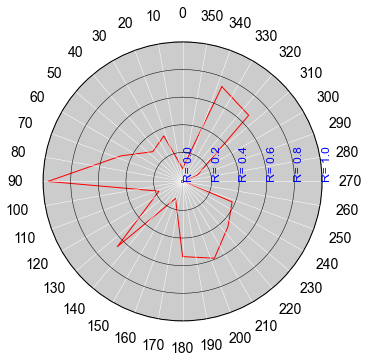

In [6]:
# Пример 11.3.2

from math import pi
import matplotlib.pyplot as plt
import numpy as np

lag = pi/8.
angles = np.arange(0, 2*pi , lag)

fig = plt.figure(figsize=(10,5)) # зададим явно размер полотна, чтобы графики не перекрывались

r = np.random.random(len(angles)) # для каждой розы значения будут разные

ax = fig.add_subplot(111, projection='polar', axisbg='#CCCCCC')

ax.plot(angles, r, color='r', linewidth=1.)
ax.plot((angles[-1],angles[0]),(r[-1],r[0]), color='r', linewidth=1.)


# Изменяем направление обхода с "против часовой" на "по часовой"
ax.set_theta_direction(1)

# Помещаем положение нуля в положение "север"
ax.set_theta_zero_location('N')

# Перемещаем ось радиусов
ax.set_rlabel_position(270)

old_rticks = ax.get_yticks()
old_phiticks = ax.get_xticks()

# Ограничиваем радиус
#ax.set_rmin(0.0)
#ax.set_rmax(0.9)
ax.set_rlim(0.0, 0.9)

small_lag = 0.01
# метод set_rgrids требует строго положительного первого значения!
new_rticks = np.arange(0.0, 1.2, 0.2) + small_lag
new_phiticks = np.arange(0., 360., 10.)

ax.set_thetagrids(new_phiticks, labels=map(int, new_phiticks), frac=1.2, fontsize=14, color='k')
ax.set_rgrids(new_rticks, fontsize=12, fmt='R= %.1f', color='b', rotation=90.)

ax.grid(True, axis='y', color='k', linestyle='-')
ax.grid(True, axis='x', color='w', linestyle='-')

save('pic_11_3_2', fmt='png')
save('pic_11_3_2', fmt='pdf')

plt.show()   

Настройка легенды у графика в полярных координат ничем не отличается от работы с легендой у графика в декартовых координатах.

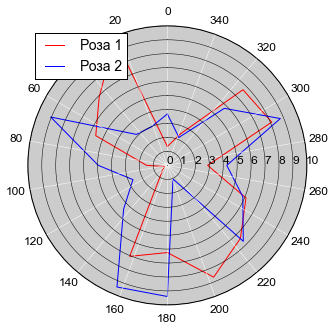

In [7]:
# Пример 11.3.3

from math import pi
import matplotlib.pyplot as plt
import numpy as np

lag = pi/8.
angles = np.arange(0, 2*pi , lag)

fig = plt.figure(figsize=(10,5)) # зададим явно размер полотна, чтобы графики не перекрывались

r = np.random.random(len(angles))*10.
r2 = np.random.random(len(angles))*10.
ax = fig.add_subplot(111, projection='polar', axisbg='#CCCCCC')

ax.plot(angles, r, color='r', linewidth=1.)
ax.plot((angles[-1],angles[0]),(r[-1],r[0]), color='r', linewidth=1., label=u'Роза 1')

ax.plot(angles, r2, color='b', linewidth=1.)
ax.plot((angles[-1],angles[0]),(r2[-1],r2[0]), color='b', linewidth=1., label=u'Роза 2')


# Изменяем направление обхода с "против часовой" на "по часовой"
ax.set_theta_direction(1)

# Помещаем положение нуля в положение "север"
ax.set_theta_zero_location('N')

# Перемещаем ось радиусов
ax.set_rlabel_position(270)

old_rticks = ax.get_yticks()
old_phiticks = ax.get_xticks()

# Ограничиваем радиус
#ax.set_rmin(0.0)
#ax.set_rmax(0.9)
ax.set_rlim(0.0, 0.9)

# метод set_rgrids требует строго положительного первого значения!
small_lag = 0.01
new_rticks = np.arange(0, 11, 1) + small_lag
new_phiticks = np.arange(0., 360., 20.)

ax.set_thetagrids(new_phiticks, labels=map(int, new_phiticks), frac=1.1, fontsize=12, color='k')
ax.set_rgrids(new_rticks, fontsize=12, fmt='%d', color='k')

ax.grid(True, axis='y', color='k', linestyle='-')
ax.grid(True, axis='x', color='w', linestyle='-')

ax.legend(ncol=1, loc=2, frameon=True, fontsize=14)

save('pic_11_3_3', fmt='png')
save('pic_11_3_3', fmt='pdf')

plt.show()

Автор: Шабанов Павел Александрович

E-mail: pa.shabanov@gmail.com

## Научная графика в Python

### Оглавление

+ [Глава 1 Библиотека matplotlib. Pyplot](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 1 Pyplot.ipynb)

+ [Глава 2 Основные графические команды](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 2 Main graphical commands.ipynb)

+ [Глава 3 Работа с текстом и шрифтами](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 3 Text and Fonts.ipynb)

+ [Глава 4 Цвет и цветовая палитра](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1 Chapter 4 Color.ipynb)

**Часть II Структура рисунка в matplotlib**

+ [Глава 5 Рисунок](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 5 Figure container.ipynb)

+ [Глава 6 Область рисования](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 6 Axes container.ipynb)

+ [Глава 7 Мультиоконные рисунки](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 7 Subplots.ipynb)

+ [Глава 8 Координатные оси](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 8 Axis container.ipynb)

+ [Глава 9 Деления координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P2 Chapter 9 Ticks container.ipynb)

**Часть III Специальные элементы рисунка в matplotlib**

+ [Глава 10 Особенности координатных осей](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 10 Twinx and log scale.ipynb)

> + [Глава 11 Графики в полярной системе координат](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 11 Polar plots.ipynb) 

+ [Глава 12 Легенда](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 12 Legends.ipynb)

+ [Глава 13 Цветовая шкала](http://nbviewer.ipython.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P3 Chapter 13 Colorbar.ipynb)